Approved Permits EDA by Zhihuan Hao

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Import

In [3]:
df = pd.read_csv("C://Users//郝治寰//Desktop//CS506 Final Project//Deliverabel 1//cleaned_approved.csv")
df.head()

,object_id,permitnumber,worktype,permittypedescr,description,comments,declared_valuation,total_fees,issued_date,expiration_date,...,property_id,parcel_id,lat,long,issued_year,issued_month,issued_day,expiration_year,expiration_month,expiration_day
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,36500.00,390.0,2021-01-28,2021-07-28,...,130392.0,3.038070e+08,42.359190,-71.052924,2021,1,28,2021.0,7.0,28.0
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,40000.00,429.0,2011-11-04,2012-05-04,...,17268.0,2.012032e+09,42.260750,-71.149611,2011,11,4,2012.0,5.0,4.0
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,5000.00,70.0,2020-06-01,NaN,...,113443.0,2.028370e+08,42.375243,-71.057585,2020,6,1,NaN,NaN,NaN
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,74295.75,803.0,2019-11-13,2020-05-13,...,129994.0,4.025580e+08,42.340600,-71.080251,2019,11,13,2020.0,5.0,13.0
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,15000.00,206.0,2013-01-03,2013-07-03,...,149852.0,2.204944e+09,42.344600,-71.154051,2013,1,3,2013.0,7.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623071 entries, 0 to 623070
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   object_id           623071 non-null  int64  
 1   permitnumber        623071 non-null  object 
 2   worktype            618516 non-null  object 
 3   permittypedescr     623071 non-null  object 
 4   description         618516 non-null  object 
 5   comments            622861 non-null  object 
 6   declared_valuation  623071 non-null  float64
 7   total_fees          623071 non-null  float64
 8   issued_date         623071 non-null  object 
 9   expiration_date     597948 non-null  object 
 10  status              623071 non-null  object 
 11  occupancytype       603501 non-null  object 
 12  sq_feet             623071 non-null  float64
 13  city                622857 non-null  object 
 14  zip                 622623 non-null  float64
 15  property_id         612372 non-nul

### Prelimitary Analysis With Respect the first two key questions

select columns for use

In [5]:
df_Q1 = df[['issued_date','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']]
df_Q1.head()

,issued_date,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021-01-28,INTEXT,Interior/Exterior Work,36500.00,0.0,Mixed
1,2011-11-04,COB,City of Boston,40000.00,170.0,Comm
2,2020-06-01,OTHER,Other,5000.00,0.0,1-3FAM
3,2019-11-13,INTEXT,Interior/Exterior Work,74295.75,0.0,Multi
4,2013-01-03,EXTREN,Renovations - Exterior,15000.00,0.0,1-2FAM


Create the year columns specifically for this analysis and select the columns

In [6]:
df_Q1 = df[['issued_date','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']]
df_Q1['issued_date'] = pd.to_datetime(df_Q1['issued_date'])
df_Q1['issued_year']= df_Q1['issued_date'].dt.year
df_Q1 = df_Q1[['issued_year','worktype', 'description', 'declared_valuation', 'sq_feet', 'occupancytype']]
df_Q1.head()

<ipython-input-6-eef1d8ff18dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q1['issued_date'] = pd.to_datetime(df_Q1['issued_date'])
<ipython-input-6-eef1d8ff18dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q1['issued_year']= df_Q1['issued_date'].dt.year


,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021,INTEXT,Interior/Exterior Work,36500.00,0.0,Mixed
1,2011,COB,City of Boston,40000.00,170.0,Comm
2,2020,OTHER,Other,5000.00,0.0,1-3FAM
3,2019,INTEXT,Interior/Exterior Work,74295.75,0.0,Multi
4,2013,EXTREN,Renovations - Exterior,15000.00,0.0,1-2FAM


Group by and turn the value within the cateogrical data of worktype into a spreaded form and count each work type

In [7]:
result_worktype = df_Q1.groupby('issued_year')['worktype'].agg(lambda x: x.value_counts().to_dict())
worktype_result = result_worktype.reset_index()
expanded_categories = pd.DataFrame.from_records(worktype_result['worktype'])
worktype_result = pd.concat([worktype_result, expanded_categories], axis=1)

In [8]:
worktype_result = worktype_result.drop('worktype', axis=1)
worktype_result

,issued_year,CONVRT,ELECTRICAL,GAS,PLUMBING,INTREN,OTHER,INTEXT,ROOF,SRVCHG,...,Staging,BFCHMDECMA,BFCHMMATTR,Dumpsters,SpeEvents,Repair,BFCHMTEMPE,Capital,PVTEMER,New
0,2006,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2.0,217.0,173.0,152.0,144.0,61.0,45.0,28.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,75.0,7426.0,4211.0,5232.0,3586.0,1522.0,1971.0,1382.0,970.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,1.0,8921.0,4174.0,5724.0,3685.0,1680.0,1936.0,1181.0,323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,7.0,8766.0,4421.0,6008.0,3537.0,1517.0,2295.0,1121.0,218.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
6,2013,648.0,9257.0,4357.0,5830.0,3701.0,1402.0,2472.0,1423.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,4.0,10628.0,4911.0,6350.0,4103.0,1411.0,2599.0,1300.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1.0,9683.0,4308.0,6074.0,4116.0,1408.0,3164.0,1913.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,71.0,NaN
9,2016,NaN,10284.0,4497.0,6540.0,4567.0,1753.0,2608.0,1583.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263.0,26.0,1.0


In [9]:
worktype_result.set_index('issued_year', inplace=True)

Separate into two groups for better visualization

In [10]:
selected_worktype500 = worktype_result.loc[:, worktype_result.mean() <= 500]
selected_worktypeAbove = worktype_result.loc[:, worktype_result.mean() > 500]

In [11]:
selected_worktype500
selected_worktypeAbove

,ELECTRICAL,GAS,PLUMBING,INTREN,OTHER,INTEXT,ROOF,LVOLT,FA,EXTREN,INTDEM,FSTTRK,CHGOCC,INSUL,SOL,Main,Service
issued_year,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,217.0,173.0,152.0,144.0,61.0,45.0,28.0,20.0,20.0,18.0,14.0,12.0,2.0,1.0,NaN,NaN,NaN
2010,7426.0,4211.0,5232.0,3586.0,1522.0,1971.0,1382.0,1561.0,1150.0,1561.0,508.0,404.0,325.0,371.0,9.0,NaN,NaN
2011,8921.0,4174.0,5724.0,3685.0,1680.0,1936.0,1181.0,2454.0,1809.0,1561.0,554.0,511.0,478.0,996.0,106.0,NaN,NaN
2012,8766.0,4421.0,6008.0,3537.0,1517.0,2295.0,1121.0,3397.0,2021.0,1707.0,544.0,651.0,545.0,947.0,518.0,7.0,5.0
2013,9257.0,4357.0,5830.0,3701.0,1402.0,2472.0,1423.0,3291.0,2128.0,1650.0,554.0,768.0,707.0,680.0,524.0,NaN,NaN
2014,10628.0,4911.0,6350.0,4103.0,1411.0,2599.0,1300.0,3651.0,2307.0,1674.0,638.0,1018.0,887.0,620.0,904.0,NaN,NaN
2015,9683.0,4308.0,6074.0,4116.0,1408.0,3164.0,1913.0,3737.0,2362.0,1782.0,722.0,1125.0,880.0,549.0,1405.0,631.0,636.0


line chart for the two groups

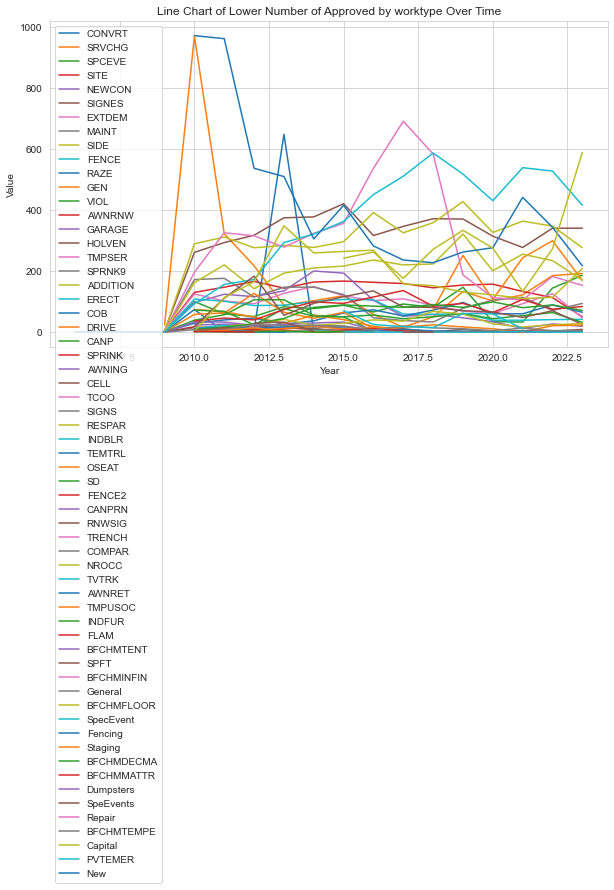

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_worktype500.columns:
    plt.plot(selected_worktype500.index, selected_worktype500[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Lower Number of Approved by worktype Over Time')
plt.legend()
plt.grid(True)

plt.show()

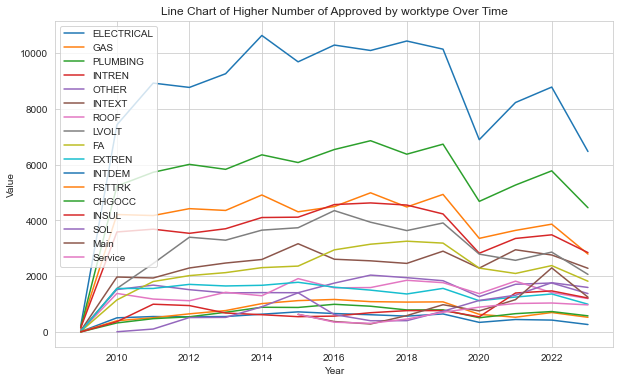

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_worktypeAbove.columns:
    plt.plot(selected_worktypeAbove.index, selected_worktypeAbove[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Higher Number of Approved by worktype Over Time')
plt.legend()
plt.grid(True)

plt.show()

Same goes to description and occupancy type

In [14]:
#'description', 'declared_valuation', 'sq_feet', 'occupancytype'

result_description = df_Q1.groupby('issued_year')['description'].agg(lambda x: x.value_counts().to_dict())
description_result = result_description.reset_index()
expanded_description = pd.DataFrame.from_records(description_result['description'])
description_result = pd.concat([description_result, expanded_description], axis=1)

In [15]:
description_result = description_result.drop('description', axis=1)
description_result.set_index('issued_year', inplace=True)
description_result.describe()

,From TimeMatters-PZ Conversion,Electrical,Gas,Plumbing,Renovations - Interior NSC,Other,Interior/Exterior Work,Roofing,Service Change,Fire Alarm,...,Fencing,Installation/Evaluation of Mat,Dumpsters,Staging,Installation of Decorative Mat,Repair,Temporary Enclosures,Capital Improvement,Prinvate Contractor-Emergency,New
count,10.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.000000,7.000000,1.0
mean,74.40000,8413.533333,3940.600000,5469.933333,3556.733333,1512.600000,2351.800000,1396.933333,181.000000,2194.400000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,284.666667,38.142857,1.0
std,202.82954,2610.011244,1202.334087,1630.602757,1101.689642,461.027703,723.146517,456.126309,232.534176,837.129005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.403660,25.360261,NaN
min,1.00000,217.000000,173.000000,152.000000,144.000000,61.000000,45.000000,28.000000,17.000000,20.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,134.000000,12.000000,1.0
25%,2.00000,7825.500000,3753.500000,5249.500000,3418.000000,1405.000000,2286.500000,1249.500000,74.000000,1920.500000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,243.000000,17.500000,1.0
50%,2.00000,8921.000000,4308.000000,5830.000000,3685.000000,1522.000000,2472.000000,1413.000000,120.000000,2290.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,272.000000,26.000000,1.0
75%,6.25000,10113.500000,4489.000000,6361.500000,4173.500000,1755.000000,2684.000000,1680.500000,189.500000,2662.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,276.000000,61.500000,1.0
max,648.00000,10628.000000,4989.000000,6856.000000,4626.000000,2039.000000,3164.000000,1913.000000,970.000000,3254.000000,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,589.000000,71.000000,1.0


In [16]:
selected_description500 = description_result.loc[:, (description_result.mean() >= 200 ) & (description_result.mean() <= 300 )]
selected_descriptionAbove = description_result.loc[:, description_result.mean() > 500]


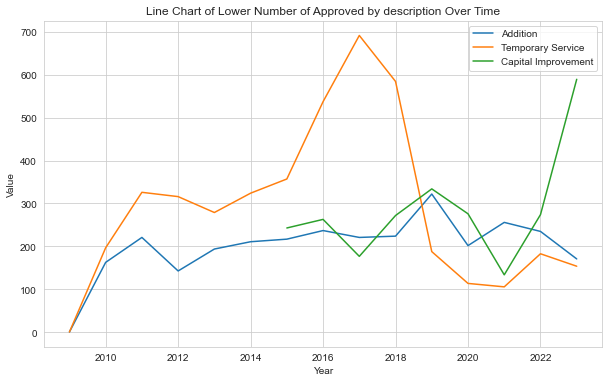

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_description500.columns:
    plt.plot(selected_description500.index, selected_description500[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Lower Number of Approved by description Over Time')
plt.legend()
plt.grid(True)

plt.show()

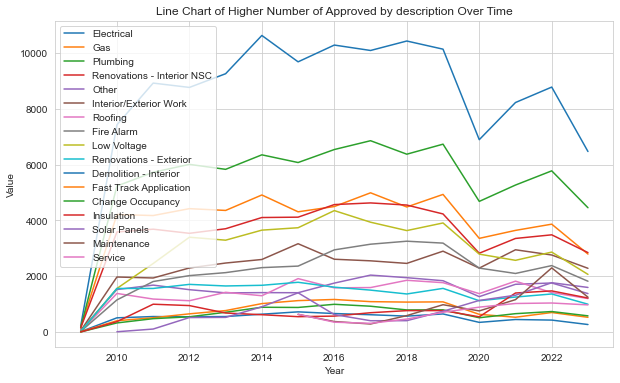

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for column in selected_descriptionAbove.columns:
    plt.plot(selected_descriptionAbove.index, selected_descriptionAbove[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Higher Number of Approved by description Over Time')
plt.legend()
plt.grid(True)

plt.show()

The declared valuation calculates the average for each year and plot the line chart

In [19]:
df_Q1.head()
df_Q1['declared_valuation'] = pd.to_numeric(df_Q1['declared_valuation'], errors='coerce')

In [89]:
past5year_declared = df_Q1[df_Q1['issued_year'] >= 2019]

In [90]:
past5year_declared

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021,INTEXT,Interior/Exterior Work,36500.00,0.0,Mixed
2,2020,OTHER,Other,5000.00,0.0,1-3FAM
3,2019,INTEXT,Interior/Exterior Work,74295.75,0.0,Multi
5,2019,INTREN,Renovations - Interior NSC,1.00,0.0,Comm
6,2019,INTREN,Renovations - Interior NSC,50000.00,0.0,1-2FAM
...,...,...,...,...,...,...
623065,2019,OSEAT,Outside Seating,0.00,0.0,Mixed
623066,2019,OSEAT,Outside Seating,0.00,0.0,Mixed
623067,2019,TEMTRL,Temporary Trailers,1000.00,0.0,Comm
623069,2023,RESPAR,Residential Parking,7000.00,0.0,1-3FAM


<Figure size 720x432 with 0 Axes>

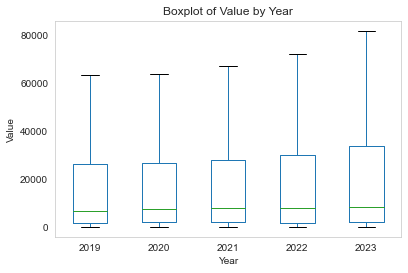

In [91]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
past5year_declared.boxplot(column='declared_valuation', by='issued_year', grid=False, showfliers=False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title
plt.show()

In [21]:
#'description', 'declared_valuation', 'sq_feet', 'occupancytype'
result_declared_valuation = df_Q1.groupby('issued_year')['declared_valuation'].agg(lambda x: x.value_counts().to_dict())
declared_valuation_result = result_declared_valuation.reset_index()
expanded_declared_valuation = pd.DataFrame.from_records(declared_valuation_result['declared_valuation'])
declared_valuation_result = pd.concat([declared_valuation_result, expanded_declared_valuation], axis=1)

In [22]:
declared_valuation_result = declared_valuation_result.drop('declared_valuation', axis=1)
declared_valuation_result.head()

,issued_year,0.0,500.0,1000.0,5000.0,2000.0,3000.0,10000.0,1500.0,2500.0,...,41870.9,151057.1,24348072.0,6266.93,39366.0,51655.0,187117.5,2920000.0,760965.0,442031.0
0,2006,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,34,59.0,58.0,55.0,41.0,38.0,36.0,30.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,2333,1351.0,2246.0,1296.0,1272.0,1186.0,916.0,844.0,874.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,2439,1666.0,2147.0,1407.0,1442.0,1125.0,906.0,1091.0,913.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_Q1.head()

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
0,2021,INTEXT,Interior/Exterior Work,36500.00,0.0,Mixed
1,2011,COB,City of Boston,40000.00,170.0,Comm
2,2020,OTHER,Other,5000.00,0.0,1-3FAM
3,2019,INTEXT,Interior/Exterior Work,74295.75,0.0,Multi
4,2013,EXTREN,Renovations - Exterior,15000.00,0.0,1-2FAM


In [24]:
#df_Q1_numdroped = df_Q1.dropna()
avg_valuation_per_year = df_Q1.groupby('issued_year')['declared_valuation'].mean().reset_index()

In [25]:
avg_valuation_per_year

,issued_year,declared_valuation
0,2006,0.000000
1,2007,0.000000
2,2009,18213.907325
3,2010,113054.781869
4,2011,97242.277470
5,2012,144589.270633
6,2013,161964.891496
7,2014,168010.085472
8,2015,213338.848744
9,2016,207318.220855


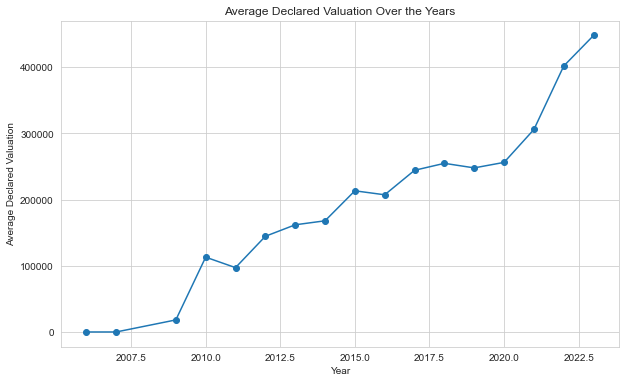

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.plot(avg_valuation_per_year['issued_year'], avg_valuation_per_year['declared_valuation'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Declared Valuation')
plt.title('Average Declared Valuation Over the Years')
plt.grid(True)

In [27]:
df_Q1['sq_feet'] = pd.to_numeric(df['sq_feet'], errors='coerce')
avg_sqft_per_year = df_Q1.groupby('issued_year')['sq_feet'].mean().reset_index()
avg_sqft_per_year

,issued_year,sq_feet
0,2006,0.000000
1,2007,0.000000
2,2009,2304.638497
3,2010,4614.826590
4,2011,245505.621013
5,2012,3694.776727
6,2013,5699.328648
7,2014,3234.337895
8,2015,633.661458
9,2016,488.220204


In [28]:
selected_rows = df_Q1[df_Q1['issued_year'] == 2011]
selected_rows

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
1,2011,COB,City of Boston,40000.0,170.0,Comm
41,2011,INTEXT,Interior/Exterior Work,4000.0,1950.0,1-2FAM
44,2011,EXTREN,Renovations - Exterior,600.0,0.0,1-2FAM
45,2011,EXTREN,Renovations - Exterior,600.0,0.0,1-2FAM
84,2011,COB,City of Boston,63444.0,0.0,Multi
...,...,...,...,...,...,...
622969,2011,DRIVE,Driveway Installation,5000.0,0.0,7More
622970,2011,DRIVE,Driveway Installation,5000.0,0.0,7More
623002,2011,DRIVE,Driveway Installation,7500.0,320.0,1-2FAM
623010,2011,OTHER,Other,0.0,0.0,Comm


In [29]:
Q1 = selected_rows['sq_feet'].quantile(0.25)
Q3 = selected_rows['sq_feet'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = selected_rows[(selected_rows['sq_feet'] < lower_bound) | (selected_rows['sq_feet'] > upper_bound)]
print(outliers)

        issued_year worktype             description  declared_valuation  \
1              2011      COB          City of Boston             40000.0   
41             2011   INTEXT  Interior/Exterior Work              4000.0   
85             2011    OTHER                   Other                 0.0   
98             2011    OTHER                   Other             50000.0   
106            2011    OTHER                   Other                 0.0   
...             ...      ...                     ...                 ...   
622660         2011    OSEAT         Outside Seating              7500.0   
622776         2011    DRIVE   Driveway Installation              2000.0   
622790         2011    DRIVE   Driveway Installation              4800.0   
622966         2011    OSEAT         Outside Seating                 0.0   
623002         2011    DRIVE   Driveway Installation              7500.0   

        sq_feet occupancytype  
1         170.0          Comm  
41       1950.0        

In [30]:
selected_rows['sq_feet'].mean()

245505.62101348408

In [31]:
sorted_df = selected_rows.sort_values(by='sq_feet', ascending=False)

In [32]:
sorted_df

,issued_year,worktype,description,declared_valuation,sq_feet,occupancytype
573703,2011,INTREN,Renovations - Interior NSC,120000.0,1.000000e+10,Comm
188630,2011,MAINT,Annual Maintenance,1.0,2.000000e+06,Other
574240,2011,OTHER,Other,600.0,1.200000e+06,Comm
355619,2011,GAS,Gas,9000.0,1.200000e+06,7More
457468,2011,TMPSER,Temporary Service,250.0,1.200000e+06,Comm
...,...,...,...,...,...,...
314306,2011,GAS,Gas,1500.0,0.000000e+00,1-2FAM
314298,2011,GAS,Gas,0.0,0.000000e+00,1-4FAM
163894,2011,ELECTRICAL,Electrical,2000.0,0.000000e+00,1-2FAM
163905,2011,COB,City of Boston,25000.0,0.000000e+00,Other


In [33]:
no_outlier = df_Q1[df_Q1['sq_feet'] < 1000000000]
avg_sqft_per_year_adjusted = no_outlier.groupby('issued_year')['sq_feet'].mean().reset_index()
avg_sqft_per_year_adjusted

,issued_year,sq_feet
0,2006,0.000000
1,2007,0.000000
2,2009,2304.638497
3,2010,4614.826590
4,2011,2987.383355
5,2012,3694.776727
6,2013,5699.328648
7,2014,3234.337895
8,2015,633.661458
9,2016,488.220204


In [102]:
avg_sqft_per_year_adjusted = avg_sqft_per_year_adjusted[avg_sqft_per_year_adjusted['issued_year'] >= 2019]

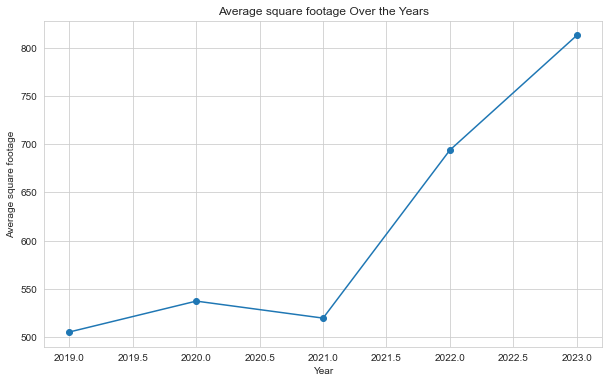

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(avg_sqft_per_year_adjusted['issued_year'], avg_sqft_per_year_adjusted['sq_feet'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average square footage')
plt.title('Average square footage Over the Years')
plt.grid(True)

<Figure size 2160x1080 with 0 Axes>

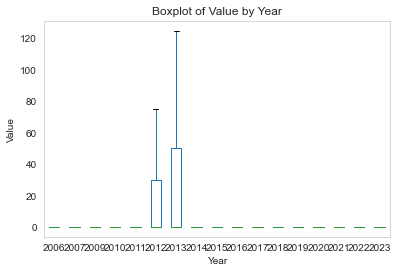

In [97]:
sns.set_style("whitegrid")
plt.figure(figsize=(30, 15))
df_Q1.boxplot(column='sq_feet', by='issued_year', grid=False, showfliers = False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title
plt.show()

<Figure size 2160x1080 with 0 Axes>

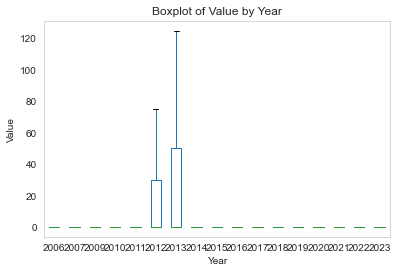

In [36]:
plt.figure(figsize=(30, 15))
no_outlier.boxplot(column='sq_feet', by='issued_year', grid=False, showfliers = False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title
plt.show()

In [69]:
result_occupancytype = df_Q1.groupby('issued_year')['occupancytype'].agg(lambda x: x.value_counts().to_dict())
occupancytype_result = result_occupancytype.reset_index()
expanded_occupancytype = pd.DataFrame.from_records(occupancytype_result['occupancytype'])
occupancytype_result = pd.concat([occupancytype_result, expanded_occupancytype], axis=1)


In [70]:
occupancytype_result

,issued_year,occupancytype,1-3FAM,COMM,1-2FAM,Comm,1Unit,Mixed,1-7FAM,7More,Multi,Other,1-4FAM,3unit,2unit,VacLd,4unit,6Unit,6unit,7unit,5unit,4Unit,MIXED
0,2006,{'1-3FAM': 2},2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,{'COMM': 2},NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,"{'1-2FAM': 296, 'Comm': 295, '1-3FAM': 114, '1...",114.0,2.0,296.0,295.0,47.0,45.0,41.0,38.0,31.0,31.0,19.0,15.0,8.0,3.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN
3,2010,"{'Comm': 10514, '1-2FAM': 9415, '1-3FAM': 3732...",3732.0,3.0,9415.0,10514.0,2672.0,1073.0,1004.0,1868.0,2389.0,1329.0,1046.0,369.0,369.0,399.0,146.0,NaN,127.0,40.0,137.0,NaN,NaN
4,2011,"{'Comm': 13318, '1-2FAM': 10571, '1-3FAM': 397...",3979.0,1.0,10571.0,13318.0,2761.0,1266.0,901.0,2058.0,2604.0,1325.0,1018.0,251.0,157.0,335.0,177.0,NaN,107.0,28.0,123.0,NaN,NaN
5,2012,"{'Comm': 13460, '1-2FAM': 12383, '1-3FAM': 422...",4227.0,NaN,12383.0,13460.0,1784.0,1560.0,496.0,1399.0,3473.0,1608.0,1131.0,158.0,108.0,258.0,112.0,NaN,105.0,14.0,82.0,NaN,NaN
6,2013,"{'1-2FAM': 14610, 'Comm': 13223, 'Multi': 5233...",4555.0,185.0,14610.0,13223.0,12.0,1869.0,11.0,23.0,5233.0,1841.0,1323.0,3.0,4.0,366.0,6.0,2.0,1.0,1.0,NaN,9.0,2.0
7,2014,"{'1-2FAM': 15186, 'Comm': 14587, 'Multi': 6025...",4828.0,NaN,15186.0,14587.0,10.0,2062.0,6.0,11.0,6025.0,1834.0,1546.0,4.0,NaN,613.0,2.0,NaN,2.0,NaN,3.0,NaN,NaN
8,2015,"{'Comm': 15741, '1-2FAM': 15563, 'Multi': 5251...",4841.0,NaN,15563.0,15741.0,1.0,1933.0,5.0,4.0,5251.0,1936.0,1691.0,NaN,1.0,293.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN
9,2016,"{'1-2FAM': 16016, 'Comm': 15650, 'Multi': 5671...",5247.0,NaN,16016.0,15650.0,NaN,2109.0,3.0,3.0,5671.0,1893.0,1357.0,NaN,NaN,460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
occupancytype_result = occupancytype_result.drop('occupancytype', axis=1)
occupancytype_result.set_index('issued_year', inplace=True)


In [79]:
occupancytype_result = occupancytype_result.iloc[12:]

In [80]:
occupancytype_result

,1-3FAM,COMM,1-2FAM,Comm,1Unit,Mixed,1-7FAM,7More,Multi,Other,1-4FAM,3unit,2unit,VacLd,4unit,6Unit,6unit,7unit,5unit,4Unit,MIXED
issued_year,,,,,,,,,,,,,,,,,,,,,
2019,5588.0,NaN,15374.0,15579.0,NaN,2468.0,1.0,2.0,6015.0,1769.0,1594.0,NaN,1.0,448.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2020,3996.0,NaN,11906.0,10006.0,NaN,1905.0,3.0,1.0,4587.0,1144.0,1080.0,NaN,NaN,237.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2021,4874.0,NaN,14721.0,10825.0,NaN,1867.0,3.0,NaN,4957.0,1549.0,1311.0,NaN,NaN,398.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022,4597.0,NaN,15775.0,12820.0,NaN,1860.0,NaN,NaN,4743.0,1515.0,1349.0,NaN,NaN,419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,3629.0,2.0,12097.0,9414.0,NaN,1669.0,NaN,1.0,4186.0,1138.0,1080.0,NaN,NaN,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
occupancytype_result500 = occupancytype_result.loc[:, occupancytype_result.mean() <= 500]
occupancytype_resultAbove = occupancytype_result.loc[:, occupancytype_result.mean() > 500]

In [82]:
occupancytype_result500

,COMM,1-7FAM,7More,2unit,VacLd,6unit,7unit,5unit
issued_year,,,,,,,,
2019,NaN,1.0,2.0,1.0,448.0,1.0,NaN,1.0
2020,NaN,3.0,1.0,NaN,237.0,NaN,NaN,2.0
2021,NaN,3.0,NaN,NaN,398.0,NaN,1.0,NaN
2022,NaN,NaN,NaN,NaN,419.0,NaN,NaN,NaN
2023,2.0,NaN,1.0,NaN,221.0,NaN,NaN,NaN


In [83]:
occupancytype_resultAbove

,1-3FAM,1-2FAM,Comm,Mixed,Multi,Other,1-4FAM
issued_year,,,,,,,
2019,5588.0,15374.0,15579.0,2468.0,6015.0,1769.0,1594.0
2020,3996.0,11906.0,10006.0,1905.0,4587.0,1144.0,1080.0
2021,4874.0,14721.0,10825.0,1867.0,4957.0,1549.0,1311.0
2022,4597.0,15775.0,12820.0,1860.0,4743.0,1515.0,1349.0
2023,3629.0,12097.0,9414.0,1669.0,4186.0,1138.0,1080.0


<Figure size 864x432 with 0 Axes>

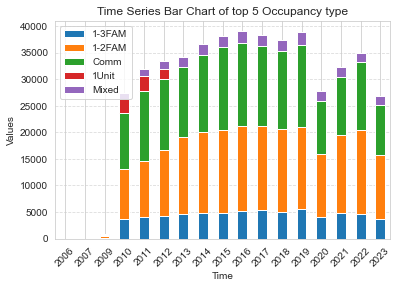

In [55]:

#occupancytype_resultAbove.set_index('issued_year', inplace=True)

columns_to_plot = ['1-3FAM','1-2FAM','Comm','1Unit','Mixed']
top_5_occupanty_type = occupancytype_resultAbove[columns_to_plot]

plt.figure(figsize=(12, 6))
top_5_occupanty_type.plot(kind='bar', stacked=True)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Bar Chart of top 5 Occupancy type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


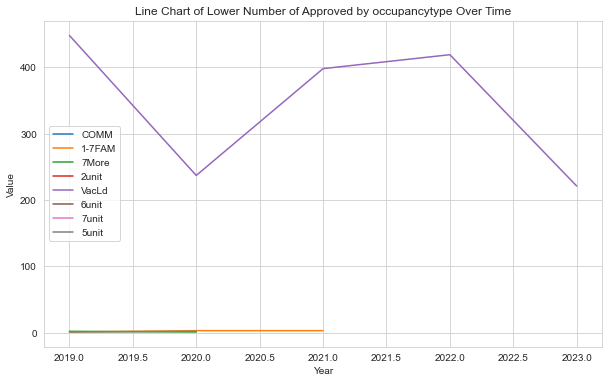

In [84]:
plt.figure(figsize=(10, 6))
for column in occupancytype_result500.columns:
    plt.plot(occupancytype_result500.index, occupancytype_result500[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Lower Number of Approved by occupancytype Over Time')
plt.legend()
plt.grid(True)

plt.show()

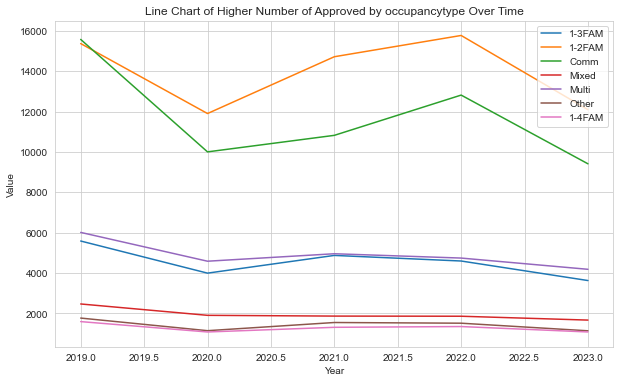

In [85]:
plt.figure(figsize=(10, 6))
for column in occupancytype_resultAbove.columns:
    plt.plot(occupancytype_resultAbove.index, occupancytype_resultAbove[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Chart of Higher Number of Approved by occupancytype Over Time')
plt.legend()
plt.grid(True)

plt.show()

In [44]:
df

,object_id,permitnumber,worktype,permittypedescr,description,comments,declared_valuation,total_fees,issued_date,expiration_date,...,property_id,parcel_id,lat,long,issued_year,issued_month,issued_day,expiration_year,expiration_month,expiration_day
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,36500.00,390.0,2021-01-28,2021-07-28,...,130392.0,3.038070e+08,42.359190,-71.052924,2021,1,28,2021.0,7.0,28.0
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,40000.00,429.0,2011-11-04,2012-05-04,...,17268.0,2.012032e+09,42.260750,-71.149611,2011,11,4,2012.0,5.0,4.0
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,5000.00,70.0,2020-06-01,NaN,...,113443.0,2.028370e+08,42.375243,-71.057585,2020,6,1,NaN,NaN,NaN
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,74295.75,803.0,2019-11-13,2020-05-13,...,129994.0,4.025580e+08,42.340600,-71.080251,2019,11,13,2020.0,5.0,13.0
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,15000.00,206.0,2013-01-03,2013-07-03,...,149852.0,2.204944e+09,42.344600,-71.154051,2013,1,3,2013.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623066,623067,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,0.00,50.0,2019-09-25,2020-03-25,...,154961.0,3.027170e+08,42.360383,-71.060818,2019,9,25,2020.0,3.0,25.0
623067,623068,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,1000.00,53.0,2019-09-12,2020-03-12,...,424193.0,2.101574e+09,42.350100,-71.129145,2019,9,12,2020.0,3.0,12.0
623068,623069,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,2700.00,53.0,2012-05-30,2012-11-30,...,24047.0,1.901861e+09,42.313220,-71.117131,2012,5,30,2012.0,11.0,30.0
623069,623070,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,7000.00,56.0,2023-04-10,2023-10-10,...,34863.0,1.701519e+09,42.290650,-71.075261,2023,4,10,2023.0,10.0,10.0


In [57]:
pd.set_option('display.max_columns', None)

In [96]:
df.head()

,object_id,permitnumber,worktype,permittypedescr,description,comments,declared_valuation,total_fees,issued_date,expiration_date,status,occupancytype,sq_feet,city,zip,property_id,parcel_id,lat,long,issued_year,issued_month,issued_day,expiration_year,expiration_month,expiration_day
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,36500.00,390.0,2021-01-28,2021-07-28,Open,Mixed,0.0,Boston,2109.0,130392.0,3.038070e+08,42.359190,-71.052924,2021,1,28,2021.0,7.0,28.0
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,40000.00,429.0,2011-11-04,2012-05-04,Open,Comm,170.0,West Roxbury,2132.0,17268.0,2.012032e+09,42.260750,-71.149611,2011,11,4,2012.0,5.0,4.0
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,5000.00,70.0,2020-06-01,NaN,Open,1-3FAM,0.0,Charlestown,2129.0,113443.0,2.028370e+08,42.375243,-71.057585,2020,6,1,NaN,NaN,NaN
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,74295.75,803.0,2019-11-13,2020-05-13,Closed,Multi,0.0,Roxbury,2118.0,129994.0,4.025580e+08,42.340600,-71.080251,2019,11,13,2020.0,5.0,13.0
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,15000.00,206.0,2013-01-03,2013-07-03,Open,1-2FAM,0.0,Brighton,2135.0,149852.0,2.204944e+09,42.344600,-71.154051,2013,1,3,2013.0,7.0,3.0


In [98]:
only_Boston = df[df['city'] == 'Boston']

In [99]:
only_Boston

,object_id,permitnumber,worktype,permittypedescr,description,comments,declared_valuation,total_fees,issued_date,expiration_date,status,occupancytype,sq_feet,city,zip,property_id,parcel_id,lat,long,issued_year,issued_month,issued_day,expiration_year,expiration_month,expiration_day
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,36500.0,390.0,2021-01-28,2021-07-28,Open,Mixed,0.0,Boston,2109.0,130392.0,3.038070e+08,42.359190,-71.052924,2021,1,28,2021.0,7.0,28.0
7,8,A1002783,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Amendment for ALT891196. All fees associated t...,0.0,32.0,2019-10-07,2020-04-07,Open,Mixed,0.0,Boston,2114.0,340676.0,3.019180e+08,42.365645,-71.061655,2019,10,7,2020.0,4.0,7.0
15,30,A1008107,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to permit # ALT842857; Fully sprinkl...,80000.0,980.0,2019-11-27,2020-05-27,Open,Mixed,0.0,Boston,2111.0,136988.0,3.048500e+08,42.354397,-71.063429,2019,11,27,2020.0,5.0,27.0
18,18,A1006047,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Amendment to;ALT849658.;;Architectural Accss B...,3000.0,50.0,2019-12-04,2020-06-04,Open,Comm,0.0,Boston,2108.0,157146.0,3.047380e+08,42.355830,-71.060401,2019,12,4,2020.0,6.0,4.0
24,24,A1007348,INTREN,Amendment to a Long Form,Renovations - Interior NSC,The renovation will entail the construction of...,0.0,273.0,2019-11-13,2020-05-13,Open,Comm,0.0,Boston,2127.0,28850.0,6.027570e+08,42.345550,-71.051940,2019,11,13,2020.0,5.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623023,623024,U49955332,OSEAT,Use of Premises,Outside Seating,Add Outside Seating for Time Out Market Groun...,1.0,56.0,2019-06-20,2019-12-20,Open,Comm,0.0,Boston,2215.0,340960.0,2.100077e+09,42.344756,-71.101414,2019,6,20,2019.0,12.0,20.0
623037,623037,U4996882,COMPAR,Use of Premises,Commercial Parking,Extend use beyond 10/31/11 (per Proviso on BZC...,0.0,50.0,2012-06-13,NaN,Open,Comm,0.0,Boston,2215.0,162464.0,5.043170e+08,42.344744,-71.098291,2012,6,13,NaN,NaN,NaN
623042,623042,U49970308,OSEAT,Use of Premises,Outside Seating,existing c of inspection for cafe #72547 doesn...,0.0,53.0,2019-07-11,2020-01-11,Open,Comm,0.0,Boston,2110.0,42089.0,3.041630e+08,42.356536,-71.055813,2019,7,11,2020.0,1.0,11.0
623065,623066,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,0.0,50.0,2019-09-25,2020-03-25,Open,Mixed,0.0,Boston,2108.0,154961.0,3.027130e+08,42.360383,-71.060818,2019,9,25,2020.0,3.0,25.0


<Figure size 720x432 with 0 Axes>

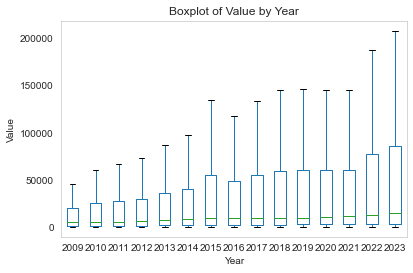

In [100]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
only_Boston.boxplot(column='declared_valuation', by='issued_year', grid=False, showfliers=False)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Boxplot of Value by Year')
plt.suptitle('')  # Remove the automatically generated title
plt.show()